In [17]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from fSNR.fSNRmap import fSNRmap
from Utils.otsu import *

In [2]:
#读取图片
pixelSize = 20
file = 'HDSMLM_20nmpixel_background_15.tif'
stack = tifffile.imread(file)

In [3]:
# sjet colorbar
sjet = np.genfromtxt('sjet.txt').astype('uint8')
colormap = list(np.array(sjet/255))
sjet_map = LinearSegmentedColormap.from_list('sJet', colormap)

In [4]:
# 不同boundaryintensity
map_bg_5 = (fSNRmap(stack, pixelSize, skip = 1, backgroundIntensity = 5, blockSize = 64, otsu = False)).astype('uint8')
map_bg_10 = (fSNRmap(stack, pixelSize, skip = 1, backgroundIntensity = 10, blockSize = 64, otsu = False)).astype('uint8')
map_bg_15 = (fSNRmap(stack, pixelSize, skip = 1, backgroundIntensity = 15, blockSize = 64, otsu = False)).astype('uint8')
map_bg_20 = (fSNRmap(stack, pixelSize, skip = 1, backgroundIntensity = 20, blockSize = 64, otsu = False)).astype('uint8')
map_stack = [map_bg_5, map_bg_10, map_bg_15, map_bg_20]

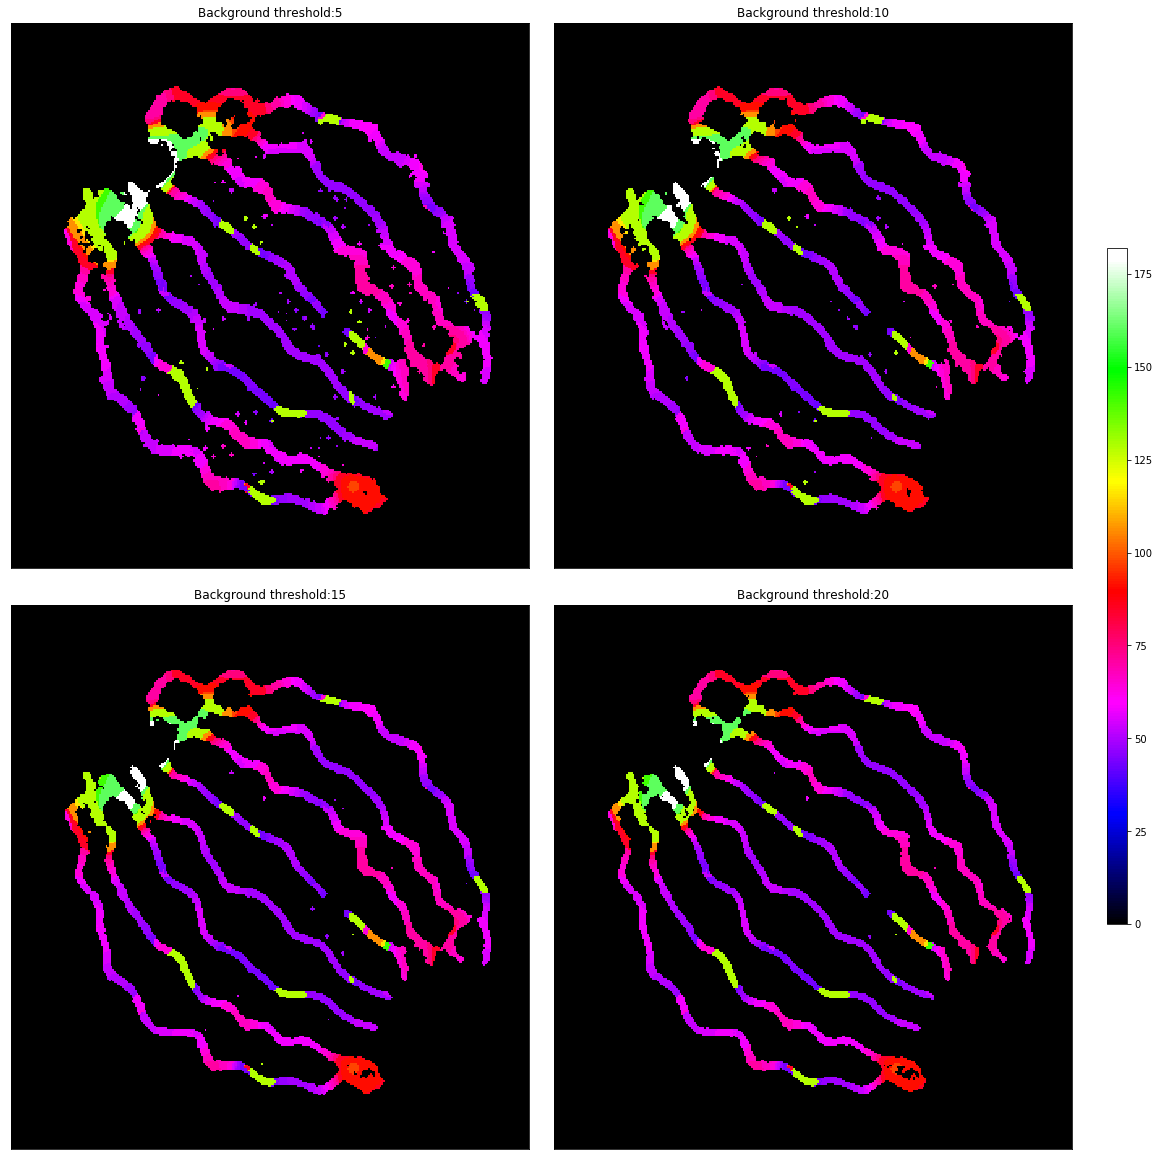

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16), constrained_layout=True)
flage = 0
for ax in axs.flat:
    Title = (('Background threshold:')+('%d'%(5*(flage+1))))
    im = ax.pcolormesh(map_stack[flage], cmap = sjet_map)
    ax.set_title(Title)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    flage = flage + 1
fig.colorbar(im, ax=axs, shrink=0.6)
plt.show()

In [7]:
#不同skip
map_skip_1 = (fSNRmap(stack, pixelSize, skip = 1, backgroundIntensity = 15, blockSize = 64, otsu = False)).astype('uint8')
map_skip_2 = (fSNRmap(stack, pixelSize, skip = 2, backgroundIntensity = 15, blockSize = 64, otsu = False)).astype('uint8')
map_skip_3 = (fSNRmap(stack, pixelSize, skip = 3, backgroundIntensity = 15, blockSize = 64, otsu = False)).astype('uint8')
map_skip_4 = (fSNRmap(stack, pixelSize, skip = 4, backgroundIntensity = 15, blockSize = 64, otsu = False)).astype('uint8')
map_skip_6 = (fSNRmap(stack, pixelSize, skip = 6, backgroundIntensity = 15, blockSize = 64, otsu = False)).astype('uint8')
map_skip_8 = (fSNRmap(stack, pixelSize, skip = 8, backgroundIntensity = 15, blockSize = 64, otsu = False)).astype('uint8')
map_skip_10 = (fSNRmap(stack, pixelSize, skip = 10, backgroundIntensity = 15, blockSize = 64, otsu = False)).astype('uint8')
map_skip_12 = (fSNRmap(stack, pixelSize, skip = 12, backgroundIntensity = 15, blockSize = 64, otsu = False)).astype('uint8')
map_stack2 = [map_skip_1, map_skip_2, map_skip_3, map_skip_4, map_skip_6, map_skip_8, map_skip_10, map_skip_12]
map_number = [1, 2, 3, 4, 6, 8, 10, 12]

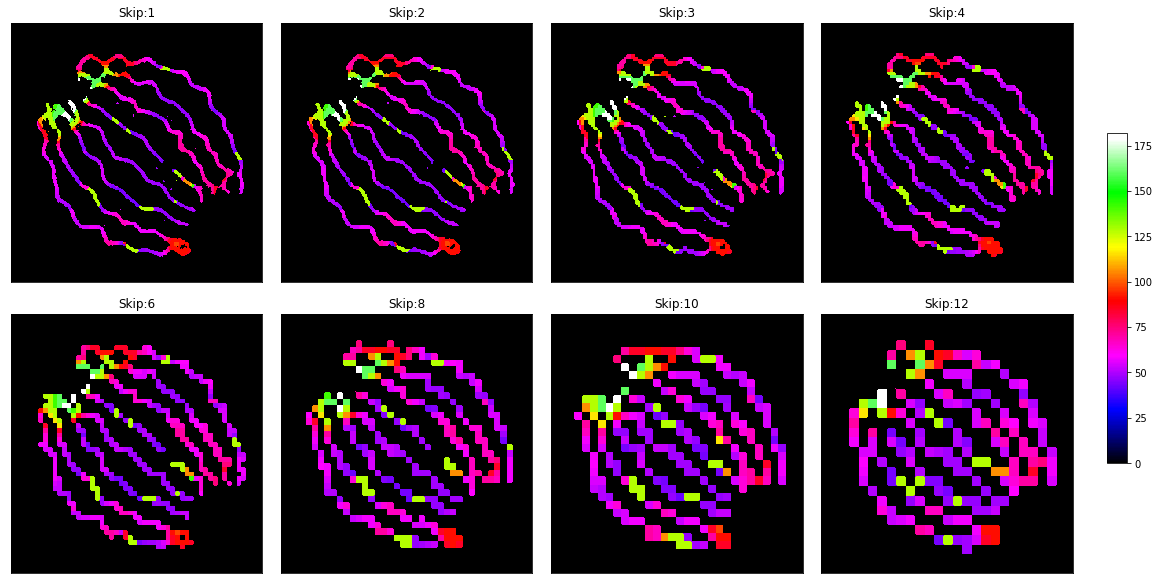

In [9]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8), constrained_layout=True)
flage = 0
for ax in axs.flat:
    Title = (('Skip:')+('%d'%(map_number[flage])))
    im = ax.pcolormesh(map_stack2[flage], cmap = sjet_map)
    ax.set_title(Title)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    flage = flage + 1
fig.colorbar(im, ax=axs, shrink=0.6)
plt.show()